In [92]:
# imports
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import scipy
import pickle
import powerlaw

In [93]:
path1 = "../dataframes/edges_df_sorted.pk1"
with open(path1, "rb") as f:
    edges_df_sorted = pickle.load(f)

path2= "../dataframes/edges_df.pk1"
with open(path2, "rb") as f:
    edges_df = pickle.load(f)

path3= "../dataframes/df_aggregated.pk1"
with open(path3, "rb") as f:
    df_aggregated = pickle.load(f)

In [94]:
edges_df

,Disease1,Disease2,Weight
0,abdominal aortic aneurysm,abdominal hernia,0.129099
1,abdominal aortic aneurysm,abscess of the lung,0.204124
2,abdominal aortic aneurysm,acute bronchiolitis,0.117851
3,abdominal aortic aneurysm,acute bronchitis,0.117851
4,abdominal aortic aneurysm,acute bronchospasm,0.123091
...,...,...,...
66556,white blood cell disease,whooping cough,0.298142
66557,white blood cell disease,wilson disease,0.192450
66558,white blood cell disease,yeast infection,0.111111
66559,whooping cough,wilson disease,0.258199


In [61]:
G = nx.Graph()

for _, row in edges_df.iterrows():
    G.add_edge(row["Disease1"], row["Disease2"], weight=row["Weight"])

In [62]:
# Code below from NetworkX CPSC 572 NetworkX Lecture Winter 2025
N = len(G)
L = G.size()

degrees = [G.degree(node) for node in G]

kmin = min(degrees)
kmax = max(degrees)

# Null Model


In [119]:
# calculate clustering coefficient and shortest path on our real data
C = np.mean(list(nx.clustering(G).values()))
d = nx.average_shortest_path_length(G, weight = 'Weight')
e = np.mean(list(nx.eigenvector_centrality(G).values()))
dc = np.mean(list(nx.degree_centrality(G).values()))
assortativity = nx.degree_assortativity_coefficient(ER)

degree_centrality = nx.degree_centrality(G)
eigenvector_centrality = nx.eigenvector_centrality(G, weight='Weight')

# Sort nodes by degree centrality (highest first) and select the top 5
top_5_nodes = sorted(degree_centrality, key=degree_centrality.get, reverse=True)[:5]

# Compute the average degree centrality of these top 5 nodes
avg_top_5_degree_centrality = np.mean([degree_centrality[node] for node in top_5_nodes])

# Sort nodes by eigenvector centrality (highest first) and select the top 5
top_5_nodes_eigen = sorted(eigenvector_centrality, key=eigenvector_centrality.get, reverse=True)[:5]

# Compute the average eigenvector centrality of these top 5 nodes
avg_top_5_eigenvector_centrality = np.mean([eigenvector_centrality[node] for node in top_5_nodes_eigen])

print("Average Clustering Coefficient: ", C)
print("Average Shortest Path: ", d)
print("Average Eigenvector Centrality", e)
print("Average Degree Centrality", dc)
print("Average Degree Centrality of Top 5 Nodes:", avg_top_5_degree_centrality)
print("Average Eigenvector Centrality of Top 5 Nodes:", avg_top_5_eigenvector_centrality)
print("Assortativity:", assortativity)

Average Clustering Coefficient:  0.5847346984108563
Average Shortest Path:  1.7916870546756127
Average Eigenvector Centrality 0.030641907200338884
Average Degree Centrality 0.22307609810374757
Average Degree Centrality of Top 5 Nodes: 0.5025906735751295
Average Eigenvector Centrality of Top 5 Nodes: 0.07696832597972163
Assortativity: 0.0009923000248725313


# Disease Symptom Graph


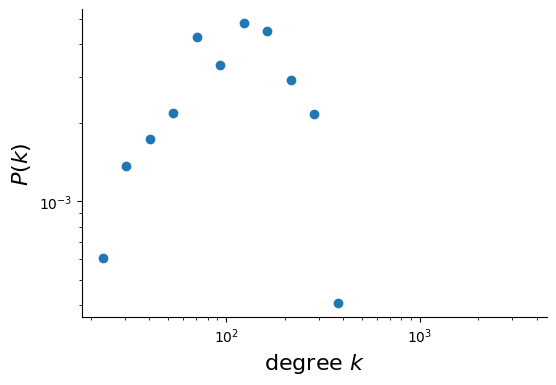

In [89]:
 
degrees = [G.degree(n) for n in G.nodes()]
kmin = min(degrees)
kmax = max(degrees)
    
if kmin>0:
    bin_edges = np.logspace(np.log10(kmin), np.log10(kmax)+1, num=20)
else:
    bin_edges = np.logspace(0, np.log10(kmax)+1, num=20)
density, _ = np.histogram(degrees, bins=bin_edges, density=True)

fig = plt.figure(figsize=(6,4))

log_be = np.log10(bin_edges)
x = 10**((log_be[1:] + log_be[:-1])/2)
plt.loglog(x, density, marker='o', linestyle='none')
plt.xlabel(r"degree $k$", fontsize=16)
plt.ylabel(r"$P(k)$", fontsize=16)

ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

# Erdös-Renyi Graph


In [97]:
GN = len(G.nodes()) # G.number_of_nodes()
# make sure same nuber of linkes 
max_L = GN*(GN-1)/2 
actual_L = len(G.edges()) 
p = actual_L/max_L 


# generate an ER graph with comparable N and average k
ER = nx.erdos_renyi_graph(GN, p, directed=False)



Plotting Degree Distribution Graph with Erdos Renyi model


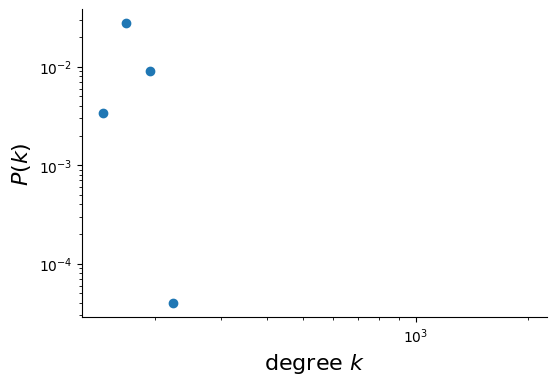

In [98]:
# plot degree distribution (P(k) vs k graph) for our ER graph
degrees = [ER.degree(n) for n in ER.nodes()]
kmin = min(degrees)
kmax = max(degrees)
    
if kmin>0:
    bin_edges = np.logspace(np.log10(kmin), np.log10(kmax)+1, num=20)
else:
    bin_edges = np.logspace(0, np.log10(kmax)+1, num=20)
density, _ = np.histogram(degrees, bins=bin_edges, density=True)

fig = plt.figure(figsize=(6,4))

log_be = np.log10(bin_edges)
x = 10**((log_be[1:] + log_be[:-1])/2)
plt.loglog(x, density, marker='o', linestyle='none')
plt.xlabel(r"degree $k$", fontsize=16)
plt.ylabel(r"$P(k)$", fontsize=16)

ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

# Show the plot
plt.show()



In [99]:
# extracted from networkX cpsc 572 lecture winter 2025

clustering_ER = []
shortest_path_ER = []
degree_centrality_ER = []
eigenvector_centrality_ER = []
avg_degree_centrality_top_5_ER = []
avg_eigenvector_centrality_top_5_ER = []
assortativity_ER = []

# generate an ensemble of 100 random graphs

# we want to create 100 graphs here, each time it goes through the loop it will create ER graph

for i in range(100): 
    
    ER = nx.erdos_renyi_graph(GN, p, directed=False)
    #calculate clustering
    C_ER = np.mean(list(nx.clustering(ER).values()))
    # check if graph is connected (when creating ER graph, not guaranteed to be connected, 
    # could exist in multiple components. if exist like that then avg shortest path length is not defined)
    if nx.is_connected(ER)==True:
        # calculate path length
        d_ER = nx.average_shortest_path_length(ER,weight=None)
   
    # Calculate assortativity for ER graph
    
    assortativity = nx.degree_assortativity_coefficient(ER)
    assortativity_ER.append(assortativity)
    
    # Calculate eigenvector centrality for ER graph

    eigenvector_centrality_values = nx.eigenvector_centrality(ER, weight='None')
    e_ER = np.mean(list(eigenvector_centrality_values.values()))
    
    # Calculate degree centrality for ER graph
    degree_centrality_values = nx.degree_centrality(ER)
    dc_ER = np.mean(list(degree_centrality_values.values()))
    
    # Sort nodes by degree centrality (highest first) and calculate average for top 5 nodes
    top_5_degree_nodes = sorted(degree_centrality_values, key=degree_centrality_values.get, reverse=True)[:5]
    avg_top_5_degree_centrality_ER = np.mean([degree_centrality_values[node] for node in top_5_degree_nodes])
    
    # Sort nodes by eigenvector centrality (highest first) and calculate average for top 5 nodes
    top_5_eigenvector_nodes = sorted(eigenvector_centrality_values, key=eigenvector_centrality_values.get, reverse=True)[:5]
    avg_top_5_eigenvector_centrality_ER = np.mean([eigenvector_centrality_values[node] for node in top_5_eigenvector_nodes])
    

    clustering_ER.append(C_ER)
    shortest_path_ER.append(d_ER)
    degree_centrality_ER.append(dc_ER)
    eigenvector_centrality_ER.append(e_ER)
    avg_degree_centrality_top_5_ER.append(avg_top_5_degree_centrality)
    avg_eigenvector_centrality_top_5_ER.append(avg_top_5_eigenvector_centrality)
    
# calculate mean and standard deviation of clustering
print(np.mean(clustering_ER))
print(np.std(clustering_ER ))
# calculate mean and standard deviation of shortest path
print(np.mean(shortest_path_ER))
print(np.std(shortest_path_ER))
# calculate mean and standard deviation of degree centrality
print(np.mean(degree_centrality_ER))
print(np.std(degree_centrality_ER ))
# calculate mean and standard deviation of eigenvector centrality
print(np.mean(eigenvector_centrality_ER))
print(np.std(eigenvector_centrality_ER ))
# calculate mean and standard deviation of average degree centrality of top 5
print(np.mean(avg_degree_centrality_top_5_ER))
print(np.std(avg_degree_centrality_top_5_ER ))
# calculate mean and standard deviation of average eigenvector centrality of top 5
print(np.mean(avg_eigenvector_centrality_top_5_ER))
print(np.std(avg_eigenvector_centrality_top_5_ER ))

print(np.mean(assortativity_ER))
print(np.std(assortativity_ER))



0.22310902654038295
0.0008718773132276491
1.7769203158409803
0.0008292836027593152
0.22307968415901974
0.0008292836027593126
0.035885573179753744
4.2727478940235095e-06
0.5025906735751294
1.1102230246251565e-16
0.0769683259797216
2.7755575615628914e-17
-0.0027208034685884475
0.0033802909159973433


Plotting the results from Clustering, Shortest Path, Degree Centrality and Eigenvector Centrality and comparing it with our Real Data



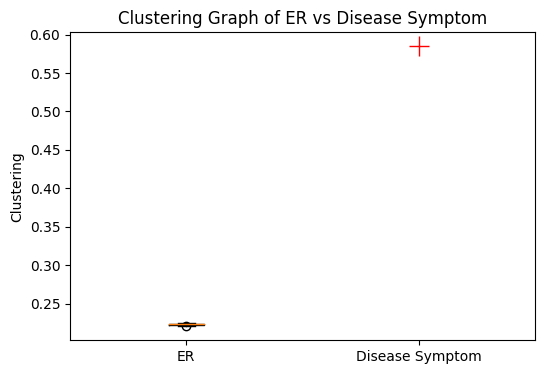

In [43]:
# open a figure and create a box plot
fig = plt.figure(figsize=(6,4))
# feed it a list of clustering ER 
# it create a boxplot of distribution of clustering across the ensemble of ER networks
plt.boxplot(clustering_ER)
plt.plot(2,C,'r',marker='+',markersize=15)
# axis settings so can create labels 
ax = plt.gca()
ax.set_xticks([1,2],labels=['ER','Disease Symptom'])
plt.title('Clustering Graph of ER vs Disease Symptom')
plt.ylabel('Clustering')
plt.xlim([0.5,2.5])
plt.show()


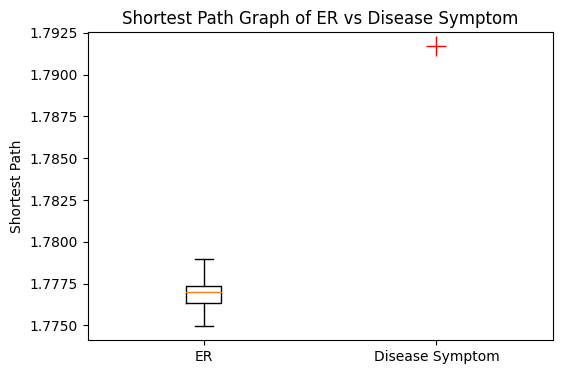

In [100]:
# open a figure and create a box plot
fig = plt.figure(figsize=(6,4))
# feed it a list of clustering ER 
# createe a boxplot of distribution of clustering across the ensemble of ER networks
plt.boxplot(shortest_path_ER)
plt.plot(2,d,'r',marker='+',markersize=15)
# axis settings so can create labels 
ax = plt.gca()
ax.set_xticks([1,2],labels=['ER','Disease Symptom'])
plt.title('Shortest Path Graph of ER vs Disease Symptom')
plt.ylabel('Shortest Path')
plt.xlim([0.5,2.5])
plt.show()

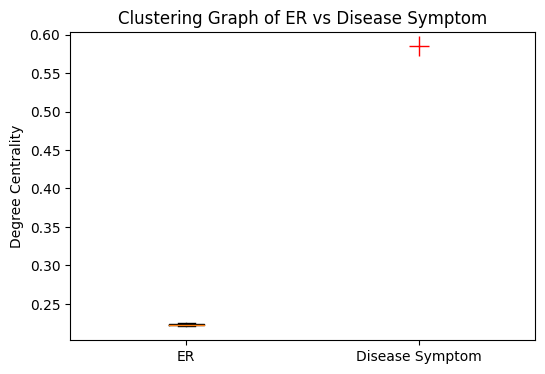

In [101]:
# open a figure and create a box plot
fig = plt.figure(figsize=(6,4))
# feed it a list of clustering ER 
# it create a boxplot of distribution of clustering across the ensemble of ER networks
plt.boxplot(degree_centrality_ER)
plt.plot(2,C,'r',marker='+',markersize=15)
# axis settings so can create labels 
ax = plt.gca()
ax.set_xticks([1,2],labels=['ER','Disease Symptom'])
plt.title('Clustering Graph of ER vs Disease Symptom')
plt.ylabel('Degree Centrality')
plt.xlim([0.5,2.5])
plt.show()


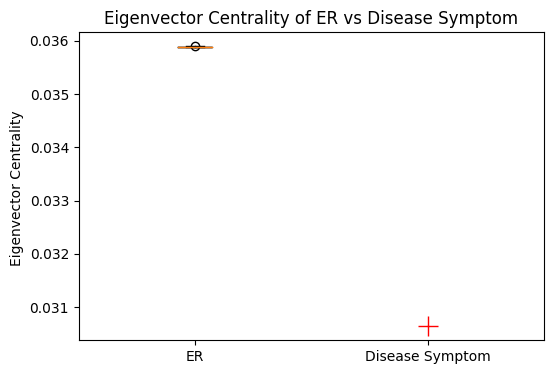

In [102]:
# open a figure and create a box plot
fig = plt.figure(figsize=(6,4))
# feed it a list of clustering ER 
# createe a boxplot of distribution of clustering across the ensemble of ER networks
plt.boxplot(eigenvector_centrality_ER)
plt.plot(2,e,'r',marker='+',markersize=15)
# axis settings so can create labels 
ax = plt.gca()
ax.set_xticks([1,2],labels=['ER','Disease Symptom'])
plt.title('Eigenvector Centrality of ER vs Disease Symptom')
plt.ylabel('Eigenvector Centrality ')
plt.xlim([0.5,2.5])
plt.show()

# Degree Preservation Graph


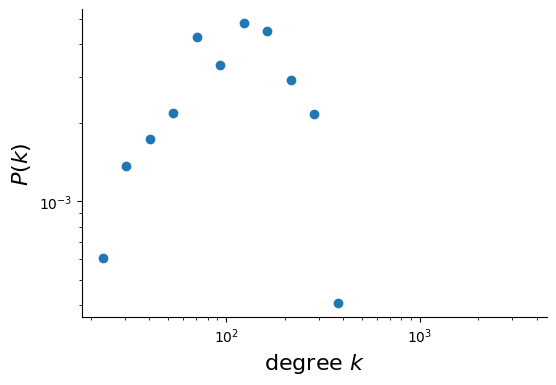

In [103]:
# create a copy of the graph 
DP = G.copy()
nx.double_edge_swap(DP,nswap=10*G.number_of_edges(),max_tries=10000000)

#  plot degree distribution graph for our DP graph 
degrees = [DP.degree(n) for n in DP.nodes()]
kmin = min(degrees)
kmax = max(degrees)
    
if kmin>0:
    bin_edges = np.logspace(np.log10(kmin), np.log10(kmax)+1, num=20)
else:
    bin_edges = np.logspace(0, np.log10(kmax)+1, num=20)
density, _ = np.histogram(degrees, bins=bin_edges, density=True)

fig = plt.figure(figsize=(6,4))

log_be = np.log10(bin_edges)
x = 10**((log_be[1:] + log_be[:-1])/2)
plt.loglog(x, density, marker='o', linestyle='none')
plt.xlabel(r"degree $k$", fontsize=16)
plt.ylabel(r"$P(k)$", fontsize=16)

ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

# Show the plot
plt.show()

In [106]:
# extracted from networkX cpsc 572 lecture winter 2025

clustering_DP = []
shortest_path_DP = []
degree_centrality_DP = []
eigenvector_centrality_DP = []
avg_degree_centrality_top_5_DP = []
avg_eigenvector_centrality_top_5_DP = []
assortativity_DP = []


# generate an ensemble of 100 random graphs
for i in range(100): # 100 is better
    
   
    # shuffle graph , use DP not the original graph or we will destroy data
    nx.double_edge_swap(DP,nswap=10*G.number_of_edges(),max_tries=10000000)
    
    
    # calculate mean of clustering
    C_DP = np.mean(list(nx.clustering(DP).values()))
    if nx.is_connected(DP)==True: # could also enforce connectivity, or run loop until we have 100 values
        d_DP = nx.average_shortest_path_length(DP,weight=None)
    
   
    # Eigenvector centrality for the DP graph (weighted by edge weights)
    eigenvector_centrality_values = nx.eigenvector_centrality(DP, weight='weight')
    avg_eigenvector_centrality_DP_value = np.mean(list(eigenvector_centrality_values.values()))
    

    
    # Calculate assorativity
    assortativity = nx.degree_assortativity_coefficient(ER)
    assortativity_ER.append(assortativity)
    
    # Append the calculated metrics to their respective lists
    clustering_DP.append(C_DP)
    shortest_path_DP.append(d_DP)
    eigenvector_centrality_DP.append(avg_eigenvector_centrality_DP_value)
       
# calculate mean and standard deviation of clustering
print(np.mean(clustering_DP))
print(np.std(clustering_DP))
# calculate mean and standard deviation of shortest path
print("Shortest path:" , np.mean(shortest_path_DP))
print("Shortest path:" ,np.std(shortest_path_DP))

# calculate mean and standard deviation of eigenvector centrality
print(np.mean(eigenvector_centrality_DP))
print(np.std(eigenvector_centrality_DP))

print("Assortativity mean (DP):", np.mean(assortativity_ER))
print("Assortativity std (DP):", np.std(assortativity_ER))


0.3394935008820225
0.0003797472459429165
Shortest path: 1.777280496551354
Shortest path: 4.343463080876731e-05
0.03276671162005718
1.3714274045939197e-05
Assortativity mean (ER): -0.0008642517218579584
Assortativity std (ER): 0.0030265438583762685


Plotting the results from Clustering and Shortest Path and comparing it with our Real Data

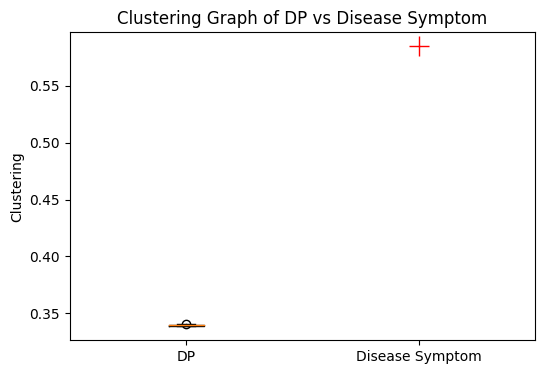

In [ ]:
# open a figure and create a box plot
fig = plt.figure(figsize=(6,4))
# feed it a list of clustering DP 
# it create a boxplot of distribution of clustering across the ensemble of ER networks
plt.boxplot(clustering_DP)
plt.plot(2,C,'r',marker='+',markersize=15)
# axis settings so can create labels 
ax = plt.gca()
ax.set_xticks([1,2],labels=['DP','Disease Symptom'])
plt.title('Clustering Graph of DP vs Disease Symptom')
plt.ylabel('Clustering')
plt.xlim([0.5,2.5])
plt.show()



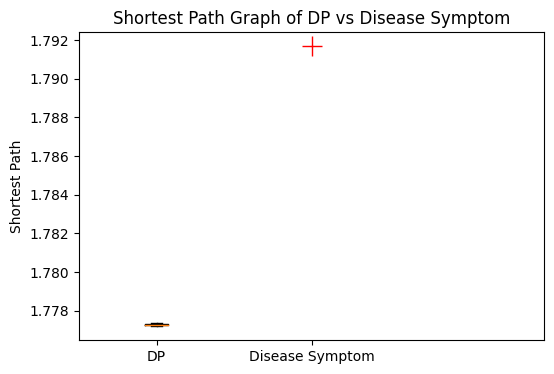

In [110]:
# open a figure and create a box plot
fig = plt.figure(figsize=(6,4))
# createea boxplot of distribution of shortest path across the ensemble of DP networks
plt.boxplot(shortest_path_DP)
plt.plot(2,d,'r',marker='+',markersize=15)
# axis settings so can create labels 
ax = plt.gca()
ax.set_xticks([1,2],labels=['DP','Disease Symptom'])
plt.title('Shortest Path Graph of DP vs Disease Symptom')
plt.ylabel('Shortest Path')
plt.xlim([0.5,3.5])
plt.show()

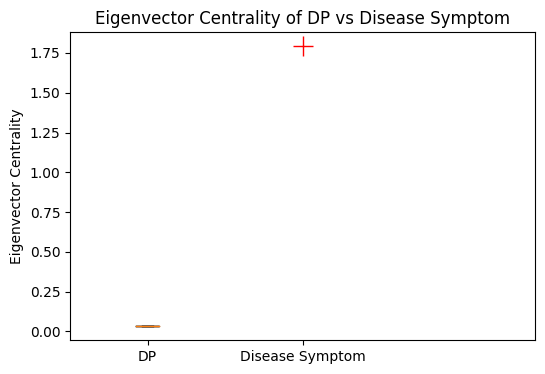

In [ ]:
# open a figure and create a box plot
fig = plt.figure(figsize=(6,4))
# createe a boxplot of distribution of degree centrality across the ensemble of DP networks
plt.boxplot(eigenvector_centrality_DP)
plt.plot(2,d,'r',marker='+',markersize=15)
# axis settings so can create labels 
ax = plt.gca()
ax.set_xticks([1,2],labels=['DP','Disease Symptom'])
plt.title('Eigenvector Centrality of DP vs Disease Symptom')
plt.ylabel('Eigenvector Centrality')
plt.xlim([0.5,3.5])
plt.show()

# Comparing ER, DP, and Disease Symptom Graph


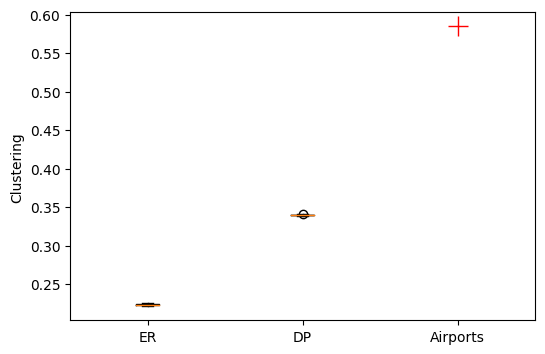

In [113]:
fig = plt.figure(figsize=(6,4))

plt.boxplot([clustering_ER,clustering_DP], positions=[1,2])
plt.plot(3,C,'r',marker='+',markersize=15)
ax = plt.gca()
ax.set_xticks([1,2,3],labels=['ER','DP','Airports'])
plt.ylabel('Clustering')
plt.xlim([0.5,3.5])
plt.show()

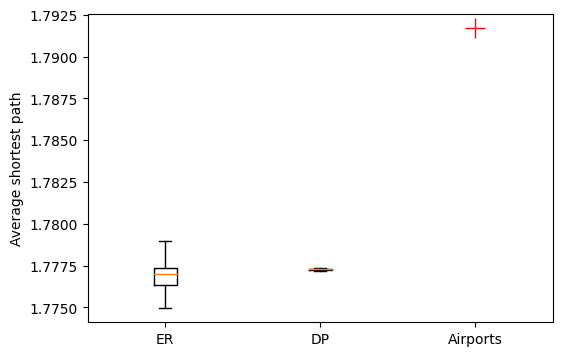

In [114]:
fig = plt.figure(figsize=(6,4))

plt.boxplot([shortest_path_ER,shortest_path_DP], positions=[1,2])
plt.plot(3,d,'r',marker='+',markersize=15)
ax = plt.gca()
ax.set_xticks([1,2,3],labels=['ER','DP','Airports'])
plt.ylabel('Average shortest path')
plt.xlim([0.5,3.5])
plt.show()

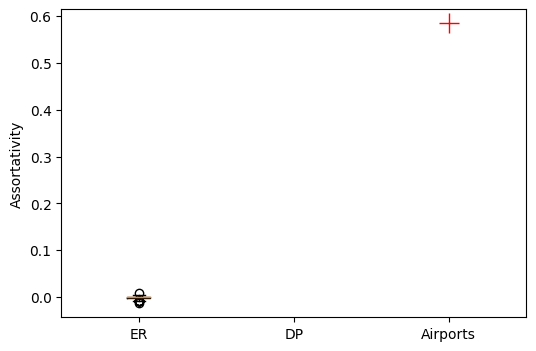

In [118]:
fig = plt.figure(figsize=(6,4))

plt.boxplot([assortativity_ER,assortativity_DP], positions=[1,2])
plt.plot(3,C,'r',marker='+',markersize=15)
ax = plt.gca()
ax.set_xticks([1,2,3],labels=['ER','DP','Airports'])
plt.ylabel('Assortativity')
plt.xlim([0.5,3.5])
plt.show()

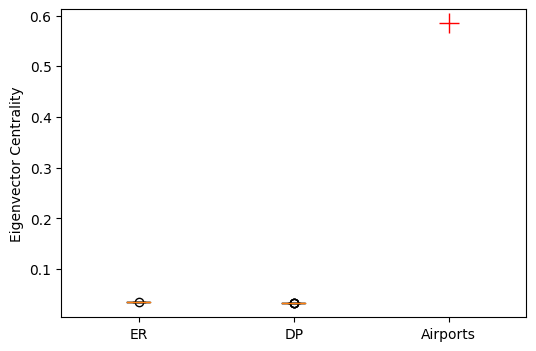

In [116]:
fig = plt.figure(figsize=(6,4))

plt.boxplot([eigenvector_centrality_ER,eigenvector_centrality_DP], positions=[1,2])
plt.plot(3,C,'r',marker='+',markersize=15)
ax = plt.gca()
ax.set_xticks([1,2,3],labels=['ER','DP','Airports'])
plt.ylabel('Eigenvector Centrality')
plt.xlim([0.5,3.5])
plt.show()